In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [4]:
path_original = "../../../data/artifical_signals/NewBlade_with_sine.csv"
df_original = pd.read_csv(path_original)

# Visualisation - New Blade

## Scatterplot - original data

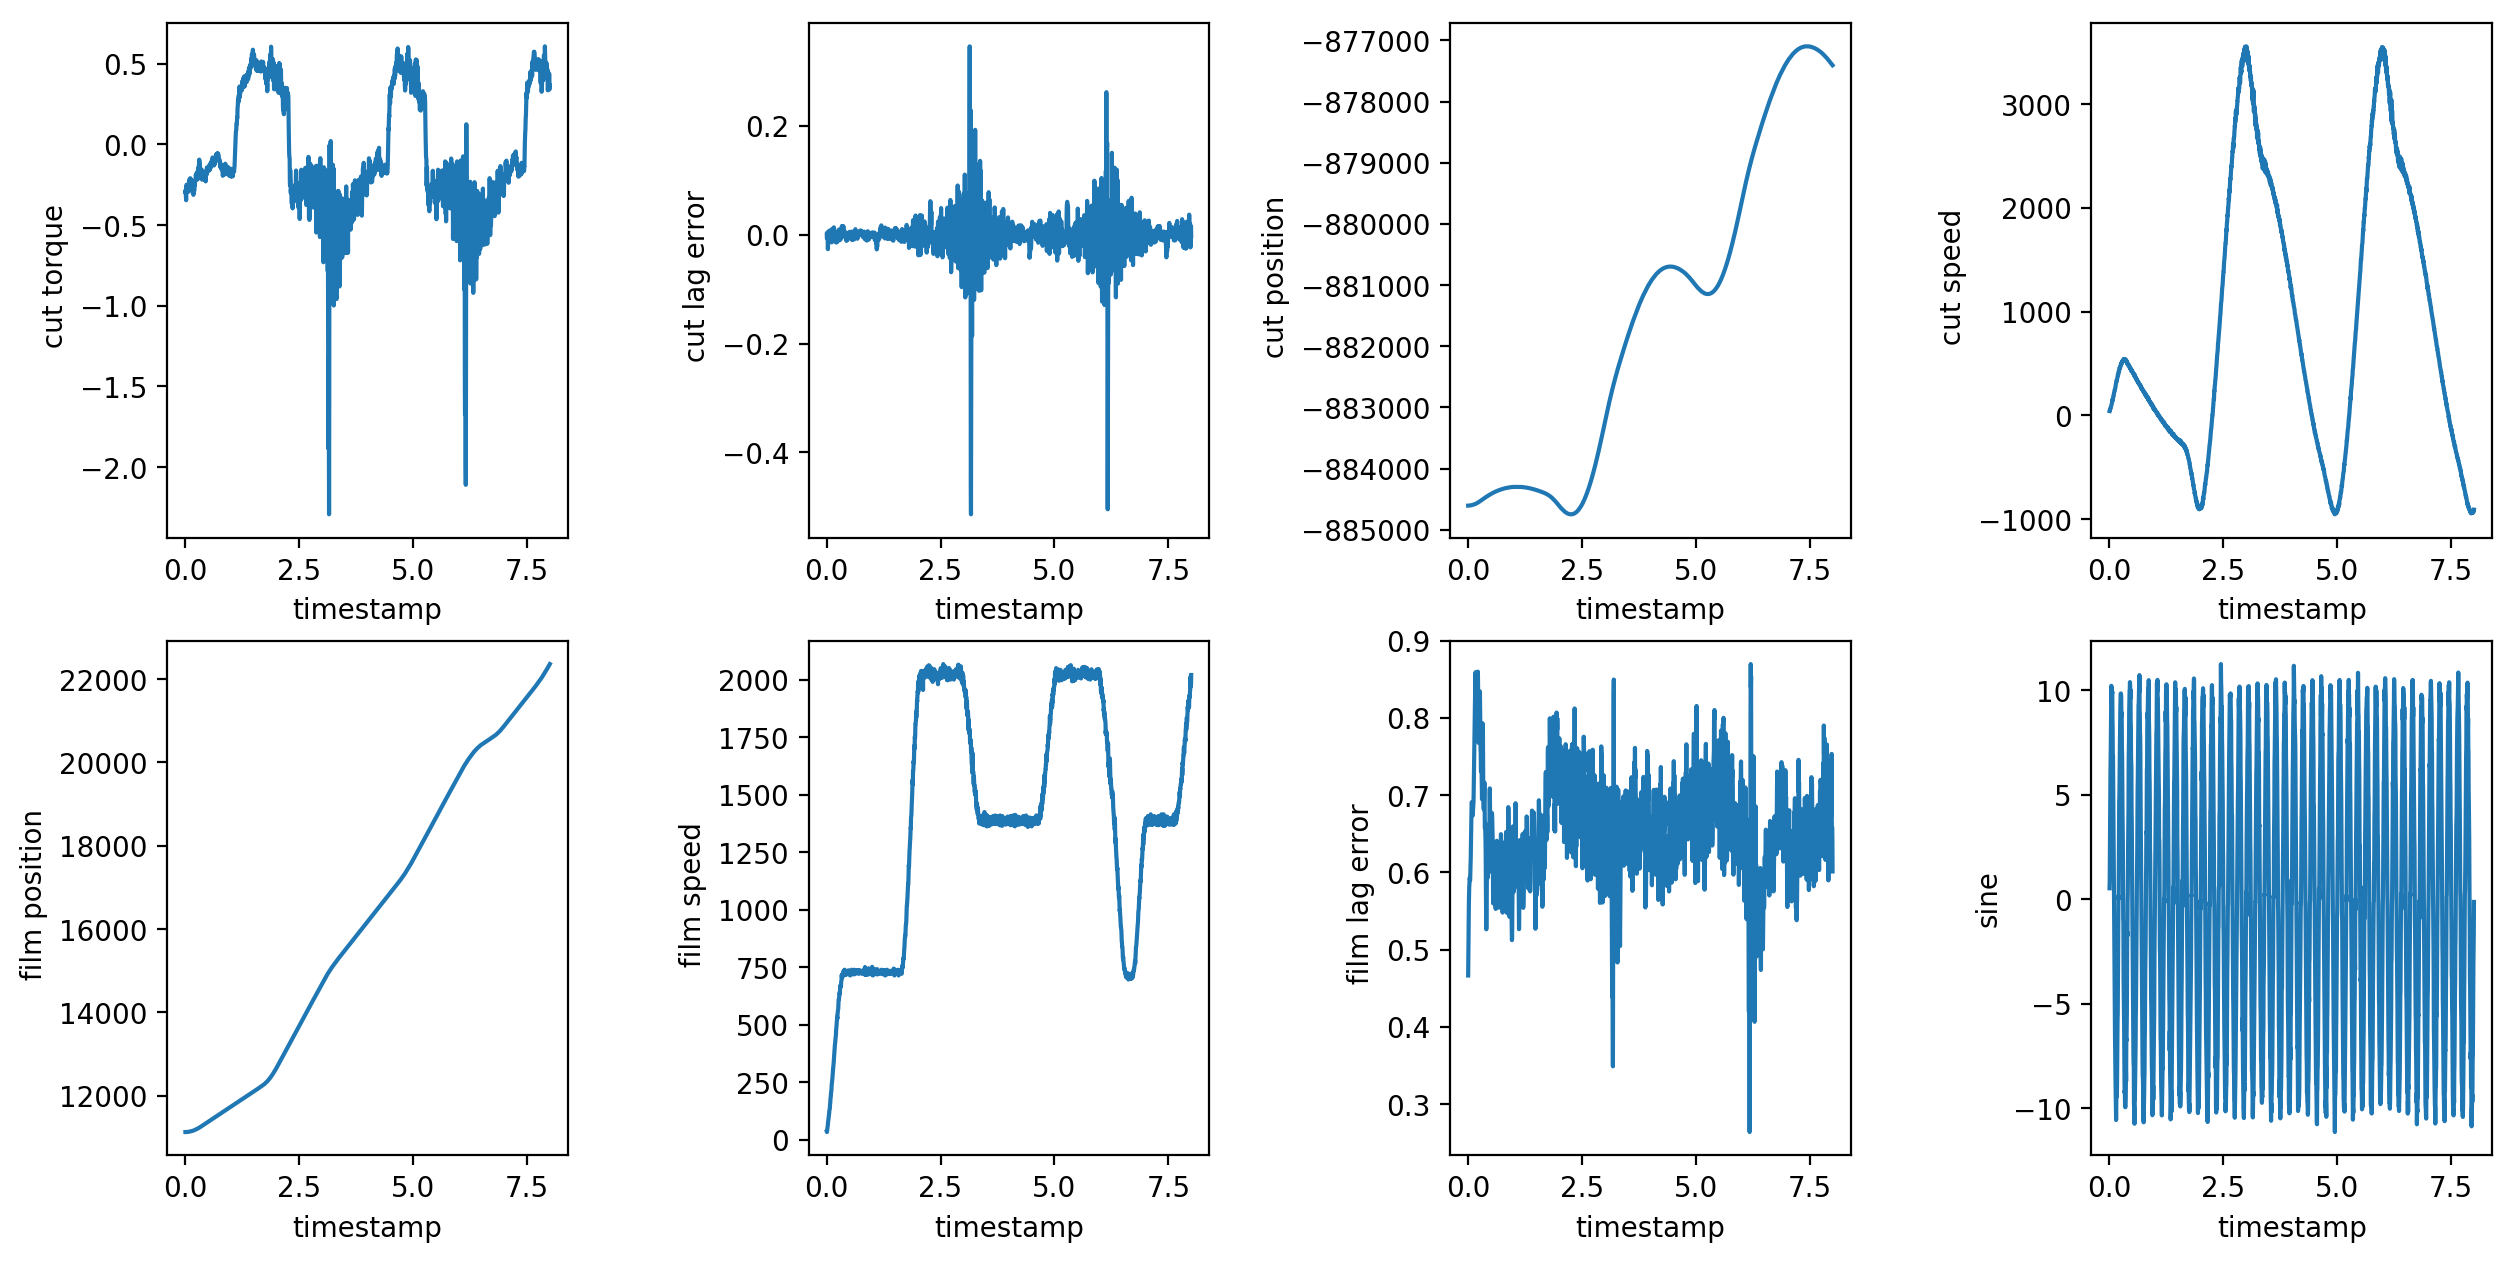

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(1,9):
    sns.lineplot(x=df_original.iloc[:,0] , y=df_original.iloc[:,i], ax=ax[i-1])
#plt.savefig("../graphs/raw_sensor_data.png")
plt.show()

## Some Statistics

In [5]:
df_original.describe()

,timestamp,cut torque,cut lag error,cut position,cut speed,film position,film speed,film lag error,sine
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.002000,-0.075474,-0.000389,-881519.754000,899.603445,16271.375000,1404.472655,0.654749,-0.002576
std,2.309978,0.376888,0.038645,2651.640233,1325.645131,3554.035663,516.378078,0.065202,7.028726
min,0.004000,-2.292097,-0.513631,-884747.000000,-954.437256,11128.000000,32.556355,0.263728,-12.058559
25%,2.003000,-0.307013,-0.010126,-884330.250000,-185.394287,12668.000000,833.945038,0.614901,-6.886418
50%,4.002000,-0.166663,-0.000373,-881136.000000,475.502014,16180.000000,1392.412842,0.653633,-0.139501
75%,6.001000,0.328293,0.009964,-879653.250000,2101.135254,19687.000000,1983.437073,0.694711,6.870947
max,7.999999,0.606260,0.346109,-877098.000000,3556.823730,22360.000000,2068.584717,0.869679,11.563904


## Correlation of sensor time series

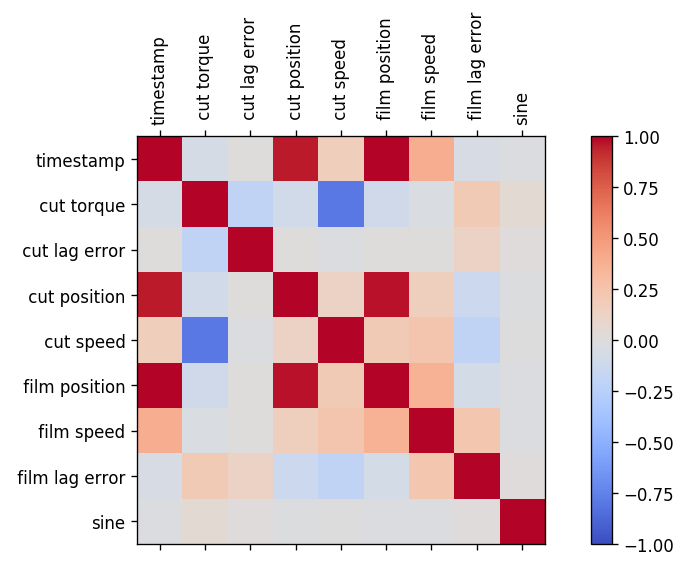

In [6]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,4.5), dpi=120)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

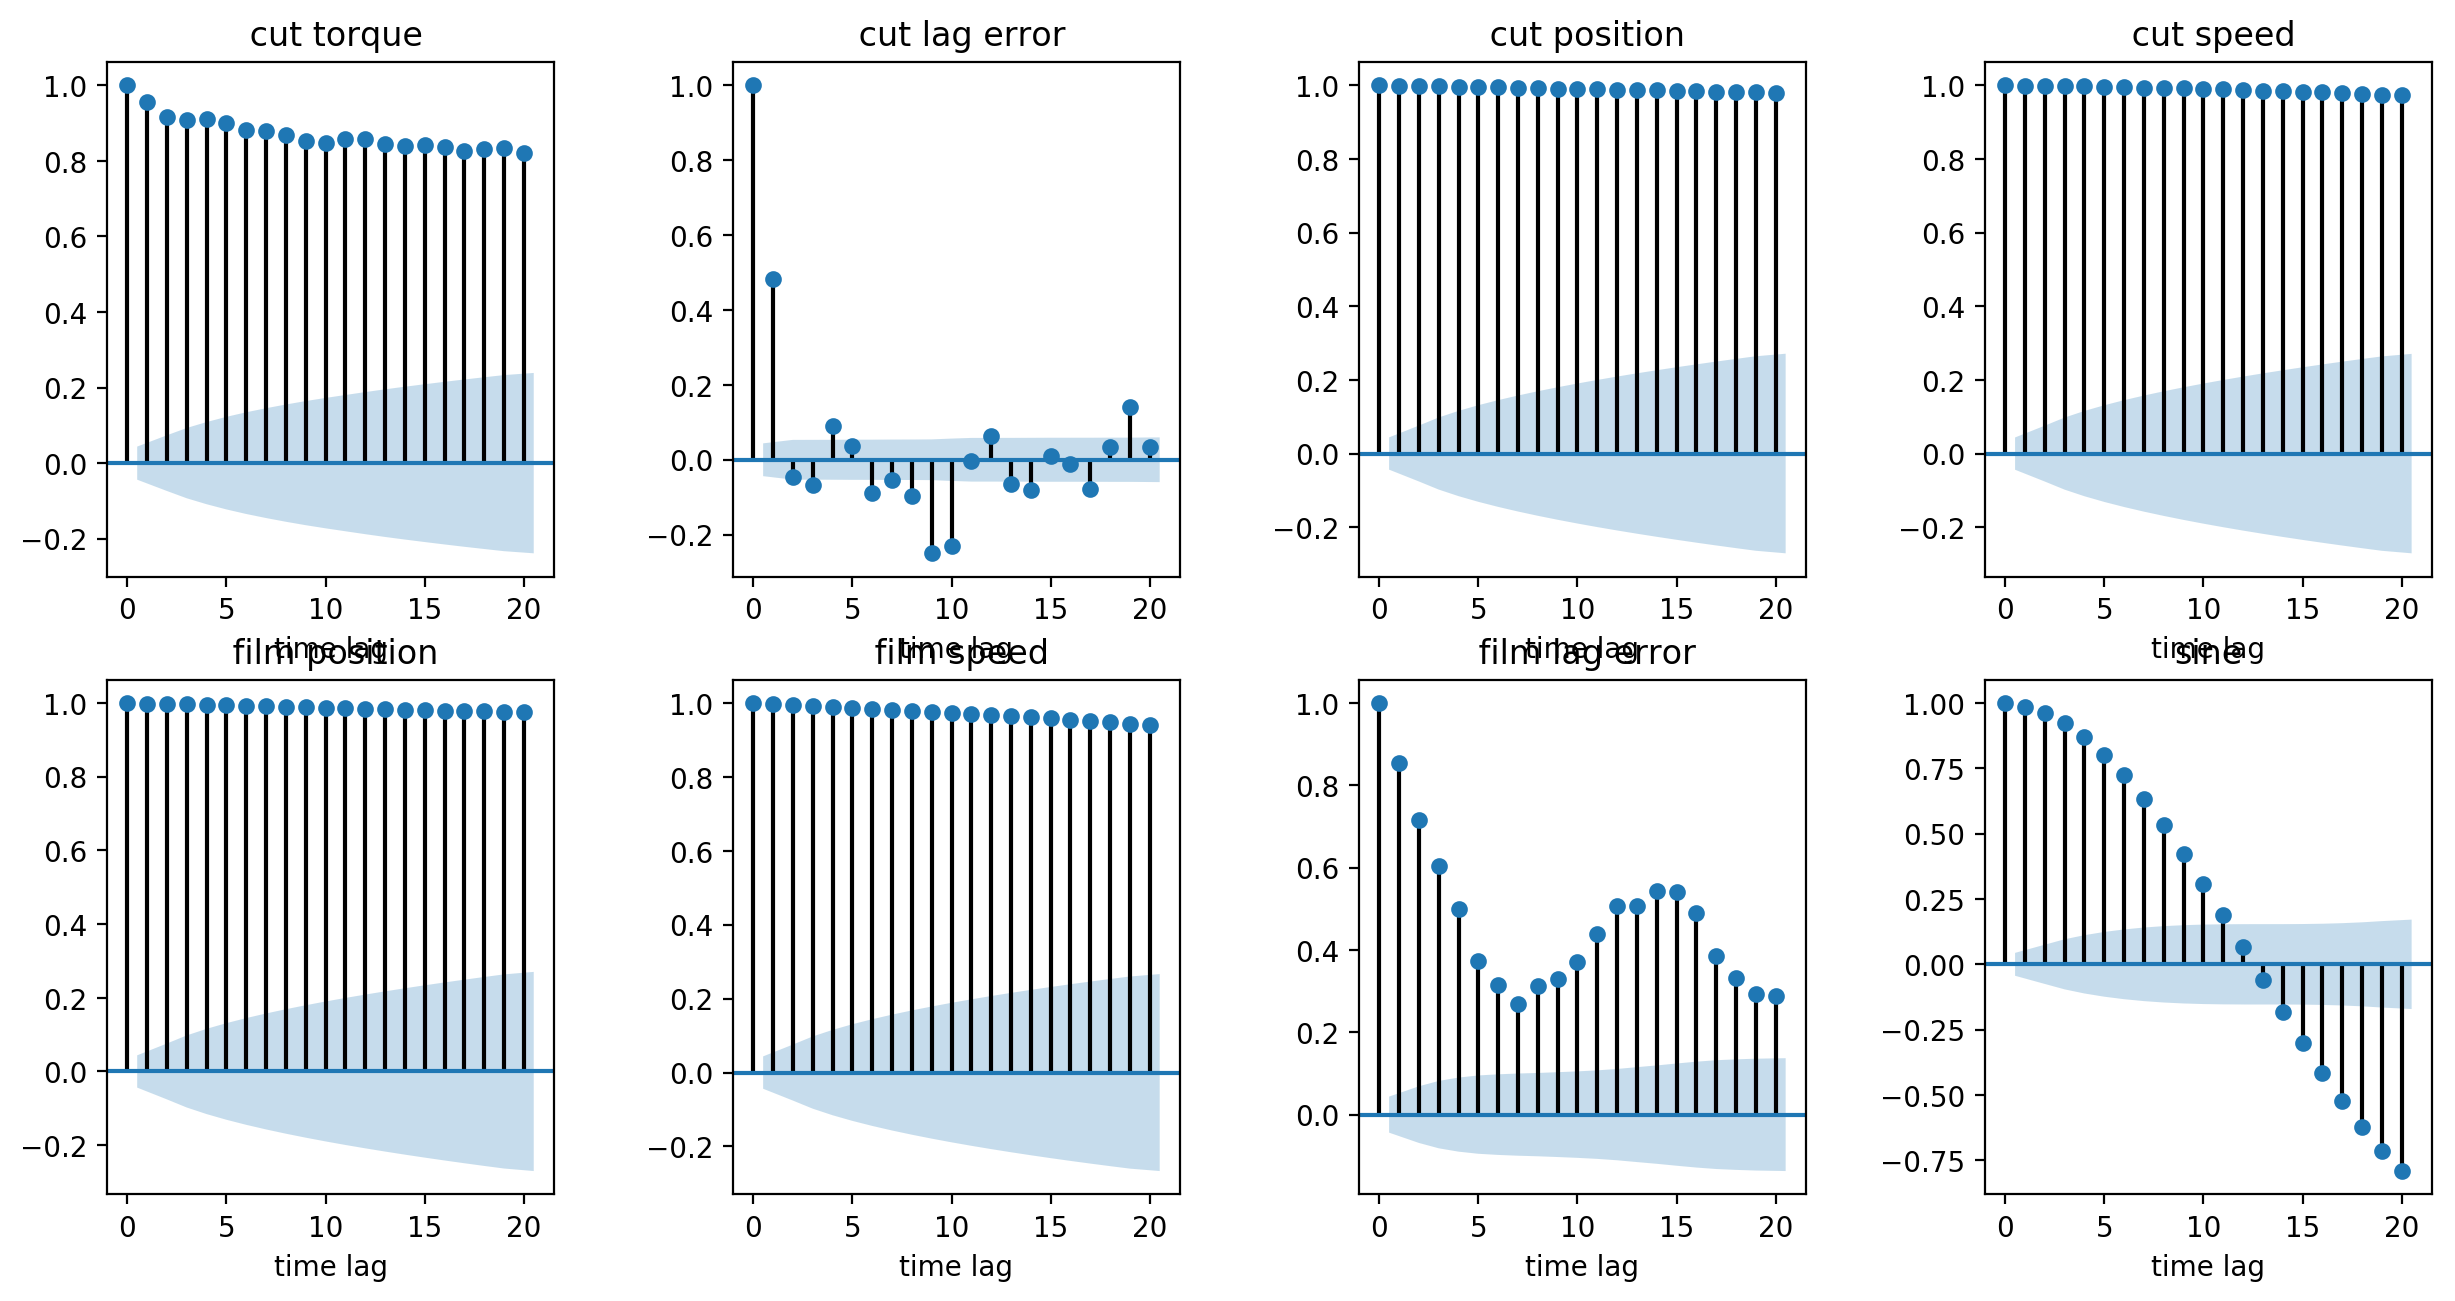

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 9):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i-1])
    ax[i-1].set_title(df_original.columns[i])
    ax[i-1].set_xlabel('time lag')
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.show()

## Histogramm 

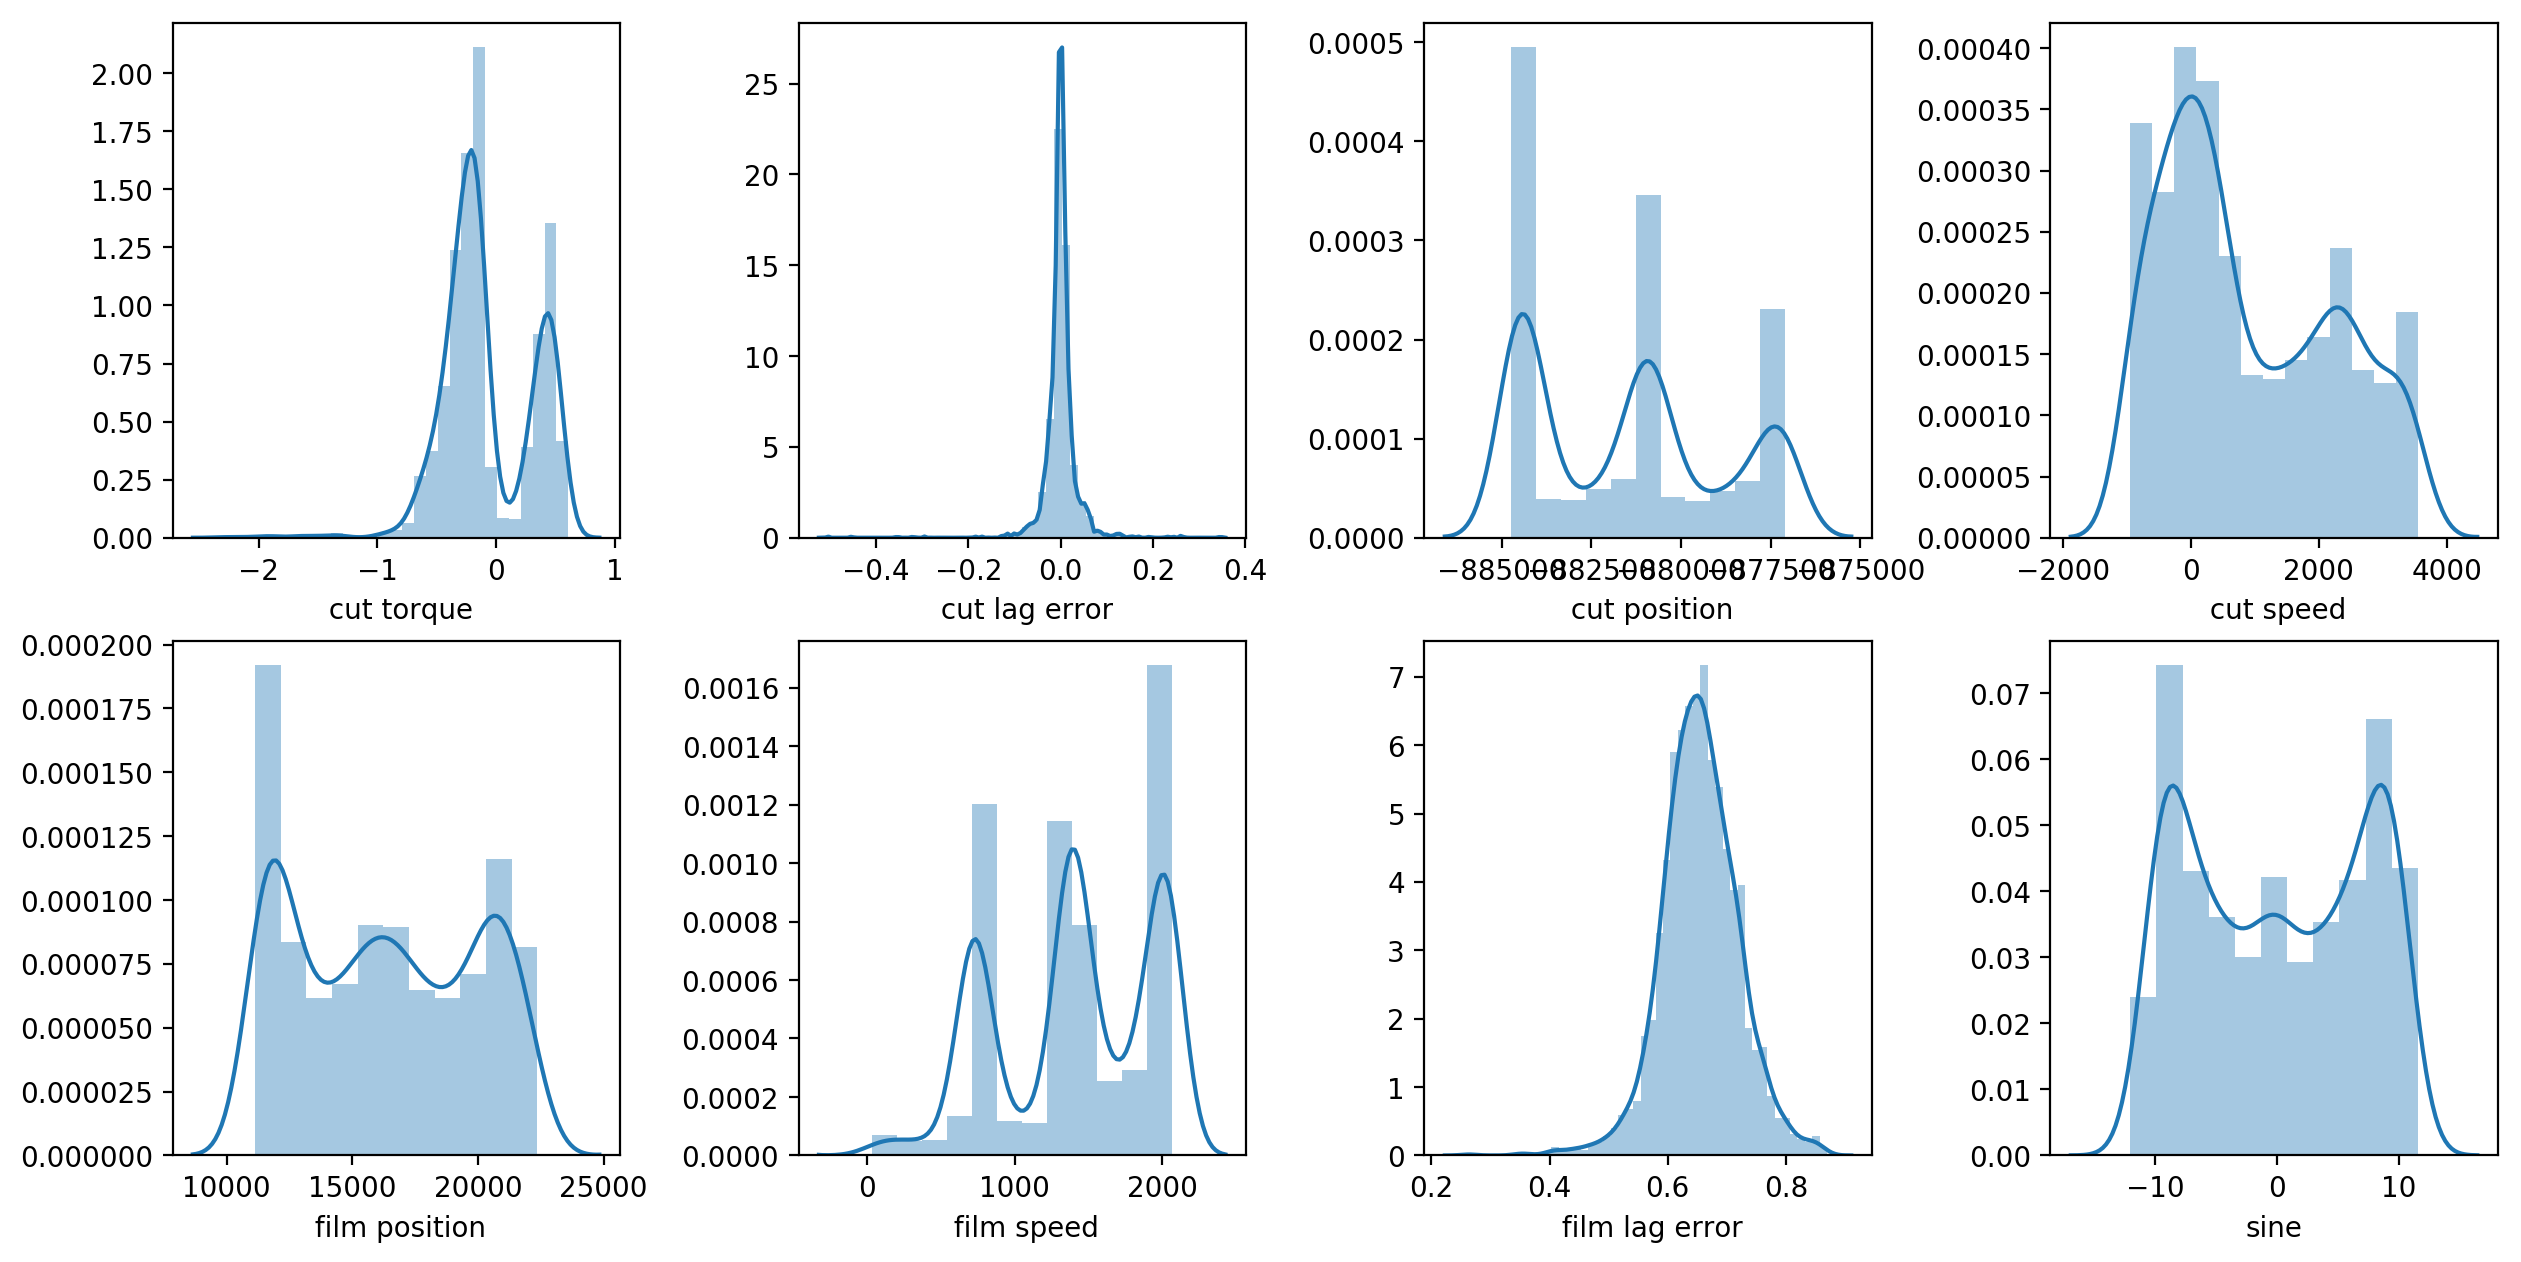

In [9]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(1, 9):
    sns.distplot(df_original.iloc[:,i], ax=ax[i-1])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.show()

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
Following time series are non-stationary:
- cut torque
- cut position
- film position

In [10]:
for i in range(1, len(df_original.columns)):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for:  cut torque
p-value: 0.43401230794686557
Time series is non-stationary
----------
Test for:  cut lag error
p-value: 4.334986760192409e-22
Time series is stationary
----------
Test for:  cut position
p-value: 0.9919428056567519
Time series is non-stationary
----------
Test for:  cut speed
p-value: 0.001413591738700251
Time series is stationary
----------
Test for:  film position
p-value: 0.9975578568310594
Time series is non-stationary
----------
Test for:  film speed
p-value: 0.10908325082336734
Time series is non-stationary
----------
Test for:  film lag error
p-value: 0.004450762163448632
Time series is stationary
----------
Test for: sine
p-value: 0.0
Time series is stationary
----------
